# Regressão Logística I
## Tarefa I

Neste exercício vamos trabalhar com a base "Heart Disease Data Set" disponível no site do [UCI](https://archive.ics.uci.edu/ml/datasets/heart+disease).

Temos 303 indivíduos e vamos utilizar 13 variáveis disponíveis para prever a presença de doença cardíaca na variável ```num```(a 14$^a$ variável).

A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

In [3]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [4]:
df['flag_doente'] = (df['num'] != 0).astype('int64')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,1


1. Monte uma bivariada para a variável ```sex``` com as seguintes estatísticas:

- Número de *saudáveis*
- Número de *doentes*
- Total
- Quantidade média de doentes
- *Odds*
- *Odds ratio* (Use o total como referência)
- Logito (LOG(*Odds*))
- O LOG do *Odds ratio* (com o total como referência) é chamado de *Weight of Evidence* (WOE). Calcule-o.

In [10]:
# Tabela de contagem de saudáveis e doentes por sexo
tabela_sex = df.groupby('sex')['flag_doente'].agg(['sum', 'count'])
tabela_sex.columns = ['Número de doentes', 'Total']
tabela_sex

,Número de doentes,Total
sex,,
0.0,25,97
1.0,114,206


In [14]:
# Calculando o número de saudáveis
tabela_sex['Número de saudáveis'] = tabela_sex['Total'] - tabela_sex['Número de doentes']
tabela_sex

,Número de doentes,Total,Número de saudáveis
sex,,,
0.0,25,97,72
1.0,114,206,92


In [22]:
# Calculando a quantidade média de doentes
tabela_sex['Quantidade média de doentes'] = tabela_sex['Número de doentes'] / tabela_sex['Total']
tabela_sex

,Número de doentes,Total,Número de saudáveis,Quantidade média de doentes
sex,,,,
0.0,25,97,72,0.257732
1.0,114,206,92,0.553398


In [28]:
# Calculando Odds (Número de doentes / Número de saudáveis)
tabela_sex['Odds'] = tabela_sex['Número de doentes'] / tabela_sex['Número de saudáveis']
tabela_sex

,Número de doentes,Total,Número de saudáveis,Quantidade média de doentes,Odds,Odds Ratio
sex,,,,,,
0.0,25,97,72,0.257732,0.347222,0.409672
1.0,114,206,92,0.553398,1.239130,1.461996


In [30]:
# Calculando Odds Ratio (usando o total como referência)
odds_total = tabela_sex['Número de doentes'].sum() / tabela_sex['Número de saudáveis'].sum()
tabela_sex['Odds Ratio'] = tabela_sex['Odds'] / odds_total
tabela_sex

,Número de doentes,Total,Número de saudáveis,Quantidade média de doentes,Odds,Odds Ratio
sex,,,,,,
0.0,25,97,72,0.257732,0.347222,0.409672
1.0,114,206,92,0.553398,1.239130,1.461996


In [32]:
# Calculando Weight of Evidence (WOE) - log(Odds Ratio)
tabela_sex['WOE'] = np.log(tabela_sex['Odds Ratio'])
tabela_sex

,Número de doentes,Total,Número de saudáveis,Quantidade média de doentes,Odds,Odds Ratio,WOE
sex,,,,,,,
0.0,25,97,72,0.257732,0.347222,0.409672,-0.892398
1.0,114,206,92,0.553398,1.239130,1.461996,0.379802


2. Monte uma bivariada para a variável ```age``` com as seguintes estatísticas:
- Categorize a variável em 5 grupos
- Calcule as mesmas quantidades calculadas no execício anterior
- Calcule também o valor médio da variável ```age```

In [34]:
# Categorizar a variável age em 5 grupos
df['age_group'] = pd.qcut(df['age'], 5, labels=False)

# Tabela de contagem de saudáveis e doentes por grupo de idade
tabela_age = df.groupby('age_group')['flag_doente'].agg(['sum', 'count'])
tabela_age.columns = ['Número de doentes', 'Total']

# Calculando o número de saudáveis
tabela_age['Número de saudáveis'] = tabela_age['Total'] - tabela_age['Número de doentes']

# Calculando a quantidade média de doentes
tabela_age['Quantidade média de doentes'] = tabela_age['Número de doentes'] / tabela_age['Total']

# Calculando Odds (Número de doentes / Número de saudáveis)
tabela_age['Odds'] = tabela_age['Número de doentes'] / tabela_age['Número de saudáveis']

# Calculando Odds Ratio (usando o total como referência)
odds_total = tabela_age['Número de doentes'].sum() / tabela_age['Número de saudáveis'].sum()
tabela_age['Odds Ratio'] = tabela_age['Odds'] / odds_total

# Calculando Logito (log(Odds))
tabela_age['Logito (log(Odds))'] = np.log(tabela_age['Odds'])

# Calculando Weight of Evidence (WOE) - log(Odds Ratio)
tabela_age['WOE'] = np.log(tabela_age['Odds Ratio'])

# Calculando o valor médio da variável age para cada grupo
tabela_age['Valor médio de age'] = df.groupby('age_group')['age'].mean()

# Exibindo a tabela final
tabela_age


,Número de doentes,Total,Número de saudáveis,Quantidade média de doentes,Odds,Odds Ratio,Logito (log(Odds)),WOE,Valor médio de age
age_group,,,,,,,,,
0,16,63,47,0.253968,0.340426,0.401653,-1.077559,-0.912166,41.222222
1,22,64,42,0.343750,0.523810,0.618020,-0.646627,-0.481235,50.000000
2,39,71,32,0.549296,1.218750,1.437950,0.197826,0.363218,56.211268
3,32,45,13,0.711111,2.461538,2.904261,0.900787,1.066179,60.355556
4,30,60,30,0.500000,1.000000,1.179856,0.000000,0.165392,66.516667


3. Visualize a informação da bivariada construída acima através de um gráfico da sua escolha.

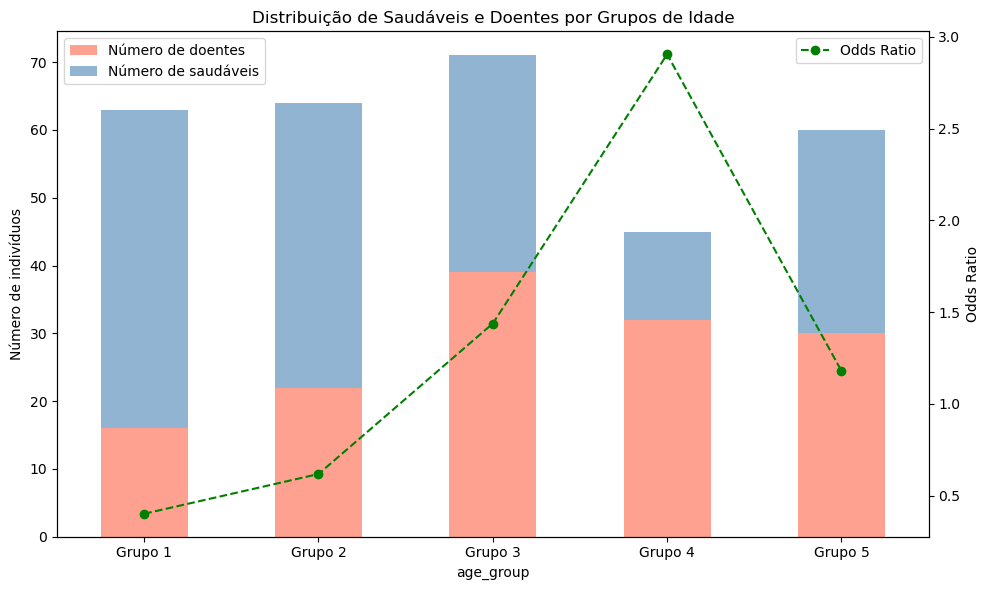

In [36]:
# Configurando o tamanho do gráfico
fig, ax1 = plt.subplots(figsize=(10, 6))

# Gráfico de barras empilhadas para saudáveis e doentes
tabela_age[['Número de doentes', 'Número de saudáveis']].plot(kind='bar', stacked=True, ax=ax1, color=['#FF6347', '#4682B4'], alpha=0.6)
ax1.set_ylabel('Número de indivíduos')
ax1.set_title('Distribuição de Saudáveis e Doentes por Grupos de Idade')

# Configurando o eixo x
ax1.set_xticklabels([f'Grupo {i+1}' for i in tabela_age.index], rotation=0)

# Criando um segundo eixo y para plotar o Odds Ratio
ax2 = ax1.twinx()
ax2.plot(tabela_age.index, tabela_age['Odds Ratio'], color='green', marker='o', label='Odds Ratio', linestyle='dashed')
ax2.set_ylabel('Odds Ratio')
ax2.grid(False)

# Exibindo a legenda
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Mostrando o gráfico
plt.tight_layout()
plt.show()